# 1. 데이터 불러오기와 데이터셋 나누기

In [ ]:
#일반적인 경고 메세지는 무시함
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Pandas 라이브러리를 선언함
import pandas as pd

In [ ]:
#One-hot Coding과 연속데이터 스케일링을 수행한 Fvote.cav 파일을 불러옴
data=pd.read_csv('Fvote.csv', encoding='utf-8')

In [ ]:
#입력에 해당하는 feature들을 X로 저장함
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [ ]:
#출력에 해당하는 레이블 중에서 vote만 y로 저장함
y=data[['vote']]

In [ ]:
#데이터를 Train와 Test 셋으로 분리하기 위한 라이브러리를 선언함
from sklearn.model_selection import train_test_split

In [ ]:
#Train셋을 X_train, y_train으로 저장하고, Test 셋으로 X_test, y_test으로 저장함
X_train, X_test, y_train, y_test=train_test_split(X, y, stratify=y, random_state=42 )

# 2. Grid Search 

In [ ]:
#모델 훈련을 위해 GridSearchCV를 선언함
from sklearn.model_selection import GridSearchCV

In [ ]:
#GridSearch의 범위를 1에서 10까지로 지정함
param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9 , 10]}

In [ ]:
#KNN 알고리즘 적용을 위한 라이브러리 선언
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#KNN 알고리즘에 GridSearch를 적용함
grid_search=GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

In [ ]:
#Train 데이터에 GridSearch를 적용함
grid_search.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
#가장 좋은 결과를 얻는 그리드를 출력함
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'n_neighbors': 9}


In [ ]:
#grid_search의 최종 스코어를 출력함
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.646


In [ ]:
#Test 데이터에 대해 grid_search 알고리즘을 적용함
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.811


In [ ]:
result_grid= pd.DataFrame(grid_search.cv_results_)

In [ ]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002792,0.000399,0.001397,0.000489,1,{'n_neighbors': 1},0.62500,0.53125,0.50000,0.451613,...,0.518987,0.059264,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.002593,0.000489,0.001596,0.000488,2,{'n_neighbors': 2},0.50000,0.46875,0.40625,0.354839,...,0.424051,0.053338,10,0.722222,0.722222,0.682540,0.779528,0.716535,0.724609,0.031185
2,0.002593,0.000798,0.001397,0.000490,3,{'n_neighbors': 3},0.65625,0.62500,0.53125,0.451613,...,0.550633,0.079080,5,0.753968,0.777778,0.801587,0.803150,0.748031,0.776903,0.023059
3,0.002594,0.000489,0.001396,0.000489,4,{'n_neighbors': 4},0.59375,0.43750,0.37500,0.419355,...,0.462025,0.074972,9,0.658730,0.730159,0.738095,0.740157,0.700787,0.713586,0.030836
4,0.002195,0.000400,0.001395,0.000489,5,{'n_neighbors': 5},0.65625,0.50000,0.62500,0.516129,...,0.563291,0.064850,4,0.690476,0.714286,0.730159,0.724409,0.700787,0.712023,0.014683
5,0.001993,0.000003,0.001596,0.000489,6,{'n_neighbors': 6},0.59375,0.40625,0.53125,0.548387,...,0.512658,0.064094,8,0.666667,0.706349,0.730159,0.653543,0.685039,0.688351,0.027439
6,0.002194,0.000399,0.001396,0.000489,7,{'n_neighbors': 7},0.59375,0.56250,0.65625,0.548387,...,0.588608,0.037415,3,0.706349,0.682540,0.714286,0.685039,0.700787,0.697800,0.012243
7,0.002394,0.000489,0.001198,0.000401,8,{'n_neighbors': 8},0.56250,0.50000,0.62500,0.516129,...,0.544304,0.045771,6,0.666667,0.674603,0.690476,0.669291,0.685039,0.677215,0.009143
8,0.002194,0.000399,0.001596,0.000489,9,{'n_neighbors': 9},0.68750,0.56250,0.65625,0.645161,...,0.645570,0.044450,1,0.714286,0.714286,0.706349,0.692913,0.685039,0.702575,0.011742
9,0.002394,0.000489,0.001396,0.000489,10,{'n_neighbors': 10},0.65625,0.59375,0.65625,0.645161,...,0.645570,0.028091,1,0.682540,0.690476,0.730159,0.622047,0.708661,0.686777,0.036284


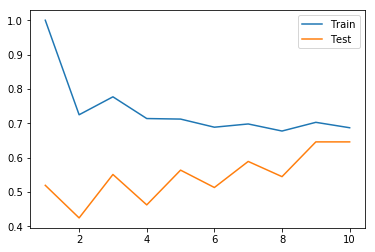

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_n_neighbors'], result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
from scipy.stats import randint

In [ ]:
param_distribs = {'n_neighbors': randint(low=1, high=20)}

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
random_search=RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_distribs, cv=5)

In [ ]:
random_search.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000014B706414E0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [ ]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'n_neighbors': 13}


In [ ]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.690


In [ ]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.774


In [ ]:
result_random = pd.DataFrame(random_search.cv_results_)

In [ ]:
result_random

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002792,3.988992e-04,0.001596,4.881698e-04,11,{'n_neighbors': 11},0.68750,0.62500,0.65625,0.677419,...,0.683544,0.049677,3,0.682540,0.714286,0.746032,0.661417,0.677165,0.696288,0.030229
1,0.002393,4.882858e-04,0.001396,4.886751e-04,3,{'n_neighbors': 3},0.65625,0.62500,0.53125,0.451613,...,0.550633,0.079080,8,0.753968,0.777778,0.801587,0.803150,0.748031,0.776903,0.023059
2,0.002394,4.890255e-04,0.001197,3.990174e-04,12,{'n_neighbors': 12},0.65625,0.59375,0.62500,0.709677,...,0.658228,0.045882,5,0.682540,0.706349,0.714286,0.653543,0.748031,0.700950,0.031654
3,0.001995,1.168008e-07,0.001598,4.907834e-04,7,{'n_neighbors': 7},0.59375,0.56250,0.65625,0.548387,...,0.588608,0.037415,7,0.706349,0.682540,0.714286,0.685039,0.700787,0.697800,0.012243
4,0.002593,4.885391e-04,0.001396,4.887334e-04,13,{'n_neighbors': 13},0.68750,0.62500,0.65625,0.774194,...,0.689873,0.050541,1,0.698413,0.698413,0.722222,0.661417,0.724409,0.700975,0.022709
5,0.002394,4.882469e-04,0.001396,4.884220e-04,8,{'n_neighbors': 8},0.56250,0.50000,0.62500,0.516129,...,0.544304,0.045771,9,0.666667,0.674603,0.690476,0.669291,0.685039,0.677215,0.009143
6,0.002194,3.993989e-04,0.001596,4.884025e-04,17,{'n_neighbors': 17},0.68750,0.65625,0.65625,0.709677,...,0.683544,0.023936,3,0.690476,0.706349,0.722222,0.685039,0.692913,0.699400,0.013395
7,0.002394,4.887919e-04,0.001396,4.892007e-04,13,{'n_neighbors': 13},0.68750,0.62500,0.65625,0.774194,...,0.689873,0.050541,1,0.698413,0.698413,0.722222,0.661417,0.724409,0.700975,0.022709
8,0.002593,4.888308e-04,0.000997,3.873843e-07,1,{'n_neighbors': 1},0.62500,0.53125,0.50000,0.451613,...,0.518987,0.059264,10,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.002195,3.987345e-04,0.001395,4.890082e-04,10,{'n_neighbors': 10},0.65625,0.59375,0.65625,0.645161,...,0.645570,0.028091,6,0.682540,0.690476,0.730159,0.622047,0.708661,0.686777,0.036284


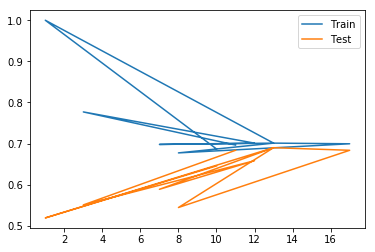

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result_random['param_n_neighbors'], result_random['mean_train_score'], label="Train")
plt.plot(result_random['param_n_neighbors'], result_random['mean_test_score'], label="Test")
plt.legend()